In [1]:
import string
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import mysql.connector

In [2]:
#Function to clean the list of sentences and return list of words in lower case
def list_final(lista):
    stopwords = open('C:\Users\TOSHIBA-PC\Desktop\Text_mining\stopwords_en.txt','r')
    stopwords_ex = ['the','phone','it','not','great','good','work','screen',
                    'battery',' phone','use','phone ','i','phones','new',
                    'purchased']
    stopwords_list = []
    for word in stopwords:
        stopwords_list.append(word.strip())
    stopwords_list.extend(stopwords_ex)
    reviews_raw1 = [review.strip().split() for review in lista
                    if str(review) != 'nan']
    reviews_flattened = [word for sublist in reviews_raw1 for word in sublist]
    reviews_flattened = [''.join(c for c in s if c not in string.punctuation)
    for s in reviews_flattened]
    reviews_flattened = [s for s in reviews_flattened if s]
    reviews_words = [word for word in reviews_flattened if word.isalpha()]
    reviews_final = [word.lower() for word in reviews_words if word not in stopwords_list]
    return reviews_final

In [3]:
#Function to get a bigram from a list of words
def bigram(review):
    bigram_price = []
    for i in range(len(review)-1):
        if 'i' not in review[i] and 'i' not in review[i+1]:
            bigram_price.append((review[i], review[i+1]))
        else:
            continue
    dict_bi = dict(Counter(bigram_price).most_common(15))
    for i,j in dict_bi.items():
        print i,':',j


In [4]:
#Function to plot a wordcloud for a list of words and name of the file to be saved as taken as second argument
def wordcloud_plot(lista,name):
    lista_text = ' '.join(lista)
    wc1 = WordCloud(background_color = "White", max_words = 2000)
    wc1.generate(lista_text)
    wc1.to_file(name+'.png')
    plt.imshow(wc1)
    plt.axis('off')
    plt.show()

In [5]:
#Function to analyze the sentiment percentage from a list of words
def percent_senti(lista):
    pos_num = 0
    neg_num = 0
    word_num = len(lista)
    for word in lista:
        if word in pos_list:
            pos_num = pos_num + 1
        if word in neg_list:
            neg_num = neg_num + 1
    pos_per = (float(pos_num)/float (word_num))*100
    neg_per = (float(neg_num)/float (word_num))*100
    print '\nThe sentiment score of this category is :', pos_per-neg_per,'%\n'

In [6]:
##Making a list of positive and negative words to analyze the sentiments
poswords = open('C:\Users\TOSHIBA-PC\Desktop\Text_mining\positive-words.txt','r')
negwords = open('C:\Users\TOSHIBA-PC\Desktop\Text_mining\s_negative-words.txt','r')
pos_list= []
neg_list= []
for word in poswords:
    pos_list.append(word.strip())
for word in negwords:
    neg_list.append(word.strip())

#Brand-wise sentiments

In [7]:
cnx = mysql.connector.connect(user='root', password='', host='127.0.0.1', database='dm')
cursor = cnx.cursor()

query1 = ("SELECT Reviews FROM amazon")
cursor.execute(query1)
val = cursor.fetchall()
reviews_raw = [x[0].encode('utf-8') for x in val]

query2 = ("SELECT `Brand Name` FROM amazon")
cursor.execute(query2)
val = cursor.fetchall()
brand_raw = [x[0].encode('utf-8') for x in val]


In [8]:
review_brand = dict(zip(reviews_raw,brand_raw))
samsung = []
motorola = []
nokia = []
apple = []
sony = []


 The following information is for Samsung phone reviews:



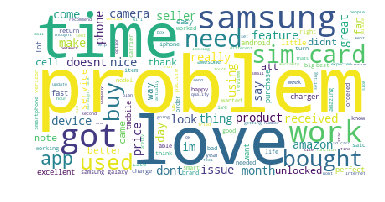

('works', 'perfect') : 182
('the', 'works') : 199
('works', 'perfectly') : 456
('make', 'sure') : 220
('great', 'product') : 177
('dont', 'buy') : 192
('excellent', 'product') : 290
('the', 'product') : 177
('samsung', 'galaxy') : 913
('galaxy', 'note') : 332
('so', 'far') : 385
('sd', 'card') : 452
('happy', 'purchase') : 220
('the', 'camera') : 279
('dont', 'know') : 387



The sentiment score of this category is : 5.32990915598 %


 The following information is for Motorola phone reviews:



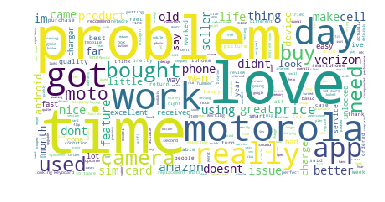

('works', 'perfectly') : 68
('moto', 'x') : 175
('make', 'sure') : 57
('hold', 'charge') : 79
('make', 'calls') : 52
('samsung', 'galaxy') : 48
('motorola', 'razr') : 60
('dont', 'want') : 50
('moto', 'g') : 166
('dont', 'know') : 105
('so', 'far') : 76
('moto', 'e') : 69
('sd', 'card') : 174
('the', 'camera') : 105
('text', 'messages') : 51



The sentiment score of this category is : 3.77891816342 %


 The following information is for Nokia phone reviews:



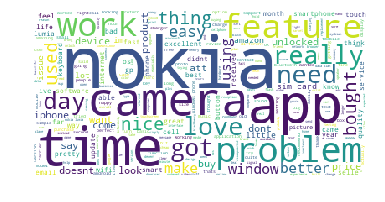

('qwerty', 'keyboard') : 125
('memory', 'card') : 115
('app', 'store') : 83
('works', 'perfectly') : 77
('make', 'sure') : 79
('make', 'calls') : 73
('data', 'plan') : 211
('factory', 'unlocked') : 82
('dont', 'know') : 158
('so', 'far') : 75
('dont', 'want') : 84
('sd', 'card') : 115
('google', 'maps') : 80
('the', 'camera') : 202
('text', 'messages') : 97



The sentiment score of this category is : 4.72841324906 %


 The following information is for Apple phone reviews:



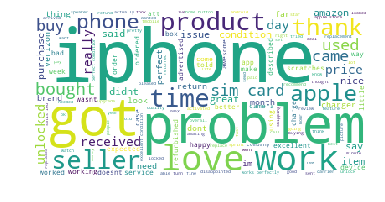

('apple', 'store') : 211
('home', 'button') : 180
('the', 'works') : 91
('works', 'perfectly') : 252
('hold', 'charge') : 133
('great', 'product') : 87
('very', 'happy') : 115
('the', 'product') : 92
('the', 'seller') : 97
('the', 'came') : 112
('looks', 'brand') : 106
('factory', 'unlocked') : 93
('so', 'far') : 114
('phone', 'works') : 113
('happy', 'purchase') : 151



The sentiment score of this category is : 5.1394062752 %


 The following information is for Sony phone reviews:



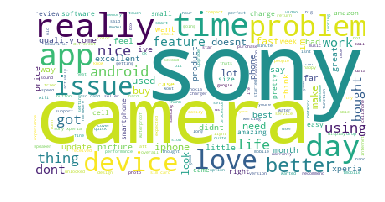

('works', 'perfectly') : 42
('water', 'proof') : 42
('make', 'sure') : 35
('gets', 'hot') : 32
('power', 'button') : 42
('excellent', 'product') : 36
('card', 'slot') : 28
('samsung', 'galaxy') : 45
('dont', 'know') : 61
('so', 'far') : 39
('dont', 'want') : 36
('sd', 'card') : 103
('the', 'camera') : 114
('camera', 'app') : 30
('dont', 'buy') : 29



The sentiment score of this category is : 4.11624229516 %

-----------------------------------------------------------------------


In [9]:
##Segregating reviews according to brands
for rev,brand in review_brand.iteritems():
    if brand == "Samsung" or brand == "samsung":
        samsung.append(rev)
    elif brand == "Motorola" or brand == "motorola":
        motorola.append(rev)
    elif brand == "Nokia" or brand == "nokia":
        nokia.append(rev)
    elif brand == "Apple" or brand == "apple":
        apple.append(rev)
    elif brand == "Sony" or brand == "sony":
        sony.append(rev)

samsung_list = list_final(samsung)
motorola_list = list_final(motorola)
nokia_list = list_final(nokia)
apple_list = list_final(apple)
sony_list = list_final(sony)
#
print '\n The following information is for Samsung phone reviews:\n'
wordcloud_plot(samsung_list,'samsung')
bigram(samsung_list)
percent_senti(samsung_list)
#
print '\n The following information is for Motorola phone reviews:\n'
wordcloud_plot(motorola_list, 'motorola')
bigram(motorola_list)
percent_senti(motorola_list)
#
print '\n The following information is for Nokia phone reviews:\n'
wordcloud_plot(nokia_list, 'nokia')
bigram(nokia_list)
percent_senti(nokia_list)
#
print '\n The following information is for Apple phone reviews:\n'
wordcloud_plot(apple_list, 'apple')
bigram(apple_list)
percent_senti(apple_list)
#
print '\n The following information is for Sony phone reviews:\n'
wordcloud_plot(sony_list, 'sony')
bigram(sony_list)
percent_senti(sony_list)
print '-----------------------------------------------------------------------'

#Rating-wise sentiments

In [11]:
query2 = ("SELECT Rating FROM amazon")
cursor.execute(query2)
rating_raw = cursor.fetchall()

In [12]:
#Entering the Reviews and ratings columns to a list
reviews_rate = dict(zip(reviews_raw,rating_raw))

rating_4 = []
rating_5 = []
ratings_low = []
##Segregating reviews according to the rating
for rev,rat in reviews_rate.items():
    if rat == (4,):
        rating_4.append(rev)
    elif rat == (5,):
        rating_5.append(rev)
    else:
        ratings_low.append(rev)
#
rating_4f = list_final(rating_4)
rating_5f = list_final(rating_5)
rating_lowf = list_final(ratings_low)



 The following information is for phones 4* rating:



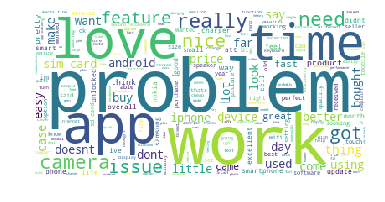

('year', 'old') : 169
('memory', 'card') : 251
('the', 'works') : 199
('works', 'perfectly') : 212
('the', 'problem') : 219
('make', 'sure') : 206
('power', 'button') : 166
('works', 'just') : 174
('data', 'plan') : 218
('samsung', 'galaxy') : 385
('dont', 'know') : 378
('so', 'far') : 554
('dont', 'want') : 171
('sd', 'card') : 676
('the', 'camera') : 514



The sentiment score of this category is : 5.39263796916 %


 The following information is for phones 5* rating:



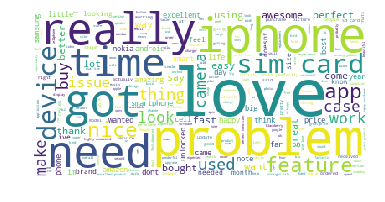

('works', 'perfect') : 529
('love', 'love') : 568
('works', 'perfectly') : 1346
('galaxy', 'note') : 478
('great', 'product') : 659
('excellent', 'product') : 978
('dont', 'know') : 503
('samsung', 'galaxy') : 1110
('the', 'best') : 614
('very', 'happy') : 624
('so', 'far') : 1038
('sd', 'card') : 1120
('absolutely', 'love') : 530
('the', 'camera') : 984
('happy', 'purchase') : 681



The sentiment score of this category is : 10.0443163239 %


 The following information is for phones  3* and below rating:



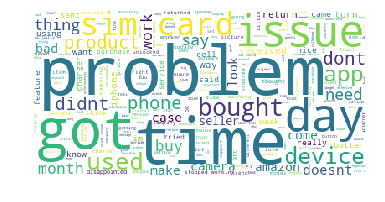

('do', 'not') : 656
('make', 'calls') : 406
('make', 'sure') : 383
('hold', 'charge') : 610
('power', 'button') : 444
('not', 'buy') : 515
('samsung', 'galaxy') : 604
('do', 'buy') : 371
('dont', 'know') : 1027
('the', 'phone') : 388
('sd', 'card') : 964
('waste', 'money') : 980
('the', 'camera') : 666
('text', 'messages') : 410
('dont', 'buy') : 1032



The sentiment score of this category is : -1.51977318343 %

-----------------------------------------------------------------------


In [20]:
print '\n The following information is for phones 4* rating:\n'
wordcloud_plot(rating_4f,'rating_of_4')
bigram(rating_4f)
percent_senti(rating_4f)
#
print '\n The following information is for phones 5* rating:\n'
wordcloud_plot(rating_5f,'rating_of_5')
bigram(rating_5f)
percent_senti(rating_5f)
#
print '\n The following information is for phones  3* and below rating:\n'
wordcloud_plot(rating_lowf,'rating_of_lower_than_3')
bigram(rating_lowf)
percent_senti(rating_lowf)
#
print '-----------------------------------------------------------------------'


#Price-range wise sentiments

In [16]:
#Entering the Reviews and price columns to a list
query2 = ("SELECT Price FROM amazon")
cursor.execute(query2)
price_raw = cursor.fetchall()
#Creating a dictionary of reviews and their price
rev_pri_dict = dict(zip(reviews_raw,price_raw))

In [18]:
reviews_149_349 = []
reviews_349_549 = []
reviews_549_749 = []
reviews_749_949 = []
reviews_ex = []
##Segregating reviews according to the price of the phone
for i,j in rev_pri_dict.items():
    if j>=(149,) and j<=(349,):
        reviews_149_349.append(i)
    elif j>(349,) and j<=(549,):
        reviews_349_549.append(i)
    elif j>(549,) and j<=(749,):
        reviews_549_749.append(i)
    elif j>(749,) and j<=(949,):
        reviews_749_949.append(i)
    elif j>(949,):
        reviews_ex.append(i)
    else:
        continue
##Cleaning the list of reviews
reviews_149f = list_final(reviews_149_349)
reviews_349f = list_final(reviews_349_549)
reviews_549f = list_final(reviews_549_749)
reviews_749f = list_final(reviews_749_949)
reviews_exf = list_final(reviews_ex)


 The following information is for phones ranging from $149 to $349:



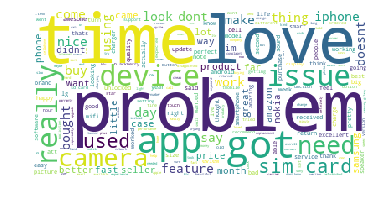

('memory', 'card') : 239
('works', 'perfectly') : 528
('make', 'sure') : 308
('power', 'button') : 295
('galaxy', 'note') : 247
('moto', 'g') : 238
('excellent', 'product') : 338
('samsung', 'galaxy') : 753
('very', 'happy') : 256
('dont', 'know') : 546
('so', 'far') : 590
('sd', 'card') : 776
('happy', 'purchase') : 290
('the', 'camera') : 697
('dont', 'buy') : 324



The sentiment score of this category is : 4.98366049999 %


 The following information is for phones ranging from $349 to $549:



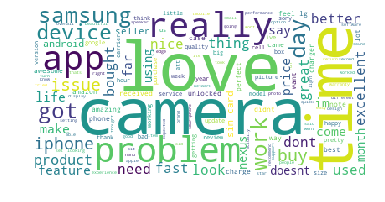

('works', 'perfect') : 67
('works', 'perfectly') : 188
('make', 'sure') : 73
('dont', 'buy') : 65
('excellent', 'product') : 98
('card', 'slot') : 66
('samsung', 'galaxy') : 212
('the', 'best') : 95
('dont', 'know') : 130
('so', 'far') : 156
('happy', 'purchase') : 68
('sd', 'card') : 146
('absolutely', 'love') : 72
('the', 'camera') : 199
('galaxy', 'note') : 78



The sentiment score of this category is : 5.67783230543 %


 The following information is for phones ranging from $549 to $749:



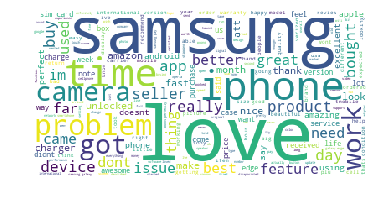

('works', 'perfect') : 26
('works', 'perfectly') : 55
('make', 'sure') : 26
('love', 'love') : 31
('excellent', 'product') : 29
('love', 'the') : 27
('samsung', 'galaxy') : 80
('the', 'best') : 42
('galaxy', 'note') : 50
('so', 'far') : 37
('galaxy', 'edge') : 64
('sd', 'card') : 33
('samsung', 'pay') : 56
('the', 'camera') : 42
('dont', 'know') : 50



The sentiment score of this category is : 5.92848816583 %


 The following information is for phones ranging from $749 to $949:



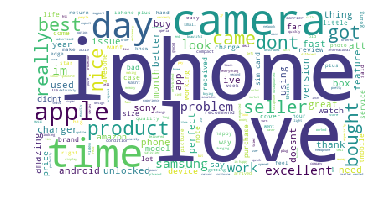

('do', 'not') : 9
('works', 'perfectly') : 8
('the', 'camera') : 12
('apple', 'watch') : 11
('love', 'love') : 9
('dont', 'know') : 8
('rose', 'gold') : 7
('samsung', 'galaxy') : 9
('the', 'best') : 12
('galaxy', 'note') : 8
('so', 'far') : 11
('make', 'sure') : 11
('att', 'network') : 7
('text', 'messages') : 7
('happy', 'purchase') : 9



The sentiment score of this category is : 6.29938188659 %


 The following information is for phones above $949:



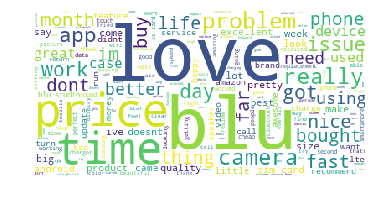

('google', 'play') : 17
('blu', 'customer') : 16
('works', 'perfectly') : 19
('love', 'blu') : 16
('c', 'hd') : 24
('do', 'not') : 16
('buy', 'blu') : 26
('the', 'blu') : 16
('samsung', 'galaxy') : 35
('dont', 'know') : 30
('so', 'far') : 35
('sd', 'card') : 65
('waste', 'money') : 18
('the', 'camera') : 57
('dont', 'buy') : 17



The sentiment score of this category is : 4.1510030566 %

-----------------------------------------------------------------------


In [19]:
print '\n The following information is for phones ranging from $149 to $349:\n'
wordcloud_plot(reviews_149f,'reviews_149_to_349')
bigram(reviews_149f)
percent_senti(reviews_149f)
#
print '\n The following information is for phones ranging from $349 to $549:\n'
wordcloud_plot(reviews_349f,'reviews_349_to_549')
bigram(reviews_349f)
percent_senti(reviews_349f)
#
print '\n The following information is for phones ranging from $549 to $749:\n'
wordcloud_plot(reviews_549f,'reviews_549_to_749')
bigram(reviews_549f)
percent_senti(reviews_549f)
#
print '\n The following information is for phones ranging from $749 to $949:\n'
wordcloud_plot(reviews_749f,'reviews_749_to_949')
bigram(reviews_749f)
percent_senti(reviews_749f)
#
print '\n The following information is for phones above $949:\n'
wordcloud_plot(reviews_exf,'reviews_greater_949')
bigram(reviews_exf)
percent_senti(reviews_exf)
#
print '-----------------------------------------------------------------------'